# Visualisation de séries temporelles


Les historiens sont très régulièrement confrontés à des séries temporelles décrivant l'évolution d'un ou de plusieurs phénomènes dans le temps. L'étude et l'exploration des séries temporelles fait l'objet d'une abondante littérature, du fait de leur usage dans de multiples contextes, offrant des méthodes allant du fort simple à l'extrèmement complexe. Ce carnet propose une introduction offrant des outils de visualiation simple et quelques notions faclitant leur visualisation. Nous utilisons pour cela des données produites par la statistique historique de la Suisse  relatives à l', [évolution du nombre de professeurs dans trois universités suisses de 1864 à 1965](https://hsso.ch/fr/2012/z/25a) Le site offre de très belles séries, très bien documentées. 
 

In [21]:
# Chargement des bibliothèques nécessaires en tête du carnet

import pandas as pd
import matplotlib.pyplot as plt

In [25]:

# Chargement des données
df = pd.read_excel('doc10/sco.xlsx')

# Affichage des premières lignes du DataFrame
print(df.head())


        AN  Z_Theo  Z_Droit  Z_med  Z_letr  Z_scienc  Z_Total  Z-Ord  Z_Extra  \
0  1864/65     8.0     10.0   13.0     NaN      30.0     61.0    NaN      NaN   
1  1866/67     NaN      NaN    NaN     NaN       NaN      NaN    NaN      NaN   
2  1868/69     NaN      NaN    NaN     NaN       NaN      NaN    NaN      NaN   
3  1870/71     NaN      NaN    NaN     NaN       NaN      NaN    NaN      NaN   
4  1872/73     NaN      NaN    NaN     NaN       NaN      NaN    NaN      NaN   

   Unnamed: 9  ...  B_Extra  Unnamed: 18  Br_Theo  BR_Droit  Br_Med  Br_Letr  \
0         NaN  ...      NaN          NaN      7.0       8.0    19.0      NaN   
1         NaN  ...      NaN          NaN      NaN       NaN     NaN      NaN   
2         NaN  ...      NaN          NaN      NaN       NaN     NaN      NaN   
3         NaN  ...      NaN          NaN      NaN       NaN     NaN      NaN   
4         NaN  ...      NaN          NaN      7.0       8.0    30.0      NaN   

   Br_sci  Br_Total  Br_Ordi  Br

Notons que le format des années ne nous arrange pas beaucoup avec sa mention d'une année scolaire. Il est assez fréquent qu'il nous faille retravailler un peu l'organisation et le format des données avant de pouvoir les analyser. L'avantage est que Python est fait pour cela. Nous voulons ici que 18ij/i(j+1) devienne 18ij de façon à ce que chaque année soit désignée par un entier.

In [26]:
# Fonction pour convertir le format de l'année
def convert_year(year):
# Nous définissons une fonction dont le nom est Convert_year, il s'agit juste de nommer l'opération à laquelle nous procédons
# l'argument de la fonction (ce qui est transformé) est nommé (par nous) year

    return year.split('/')[0]
# nous lisons ce qui est contenu dans "year" et le divisons en deux parties de part et d'autre du sépérateur '/' que nous rangeons ds une liste
# si year est '1864/5', year.split('/') produit la liste ['1864', '5'].
# [0] nous permet d'accéder au premier élément de notre liste (1864 dans l'exemple)


# Application de la fonction à la première colonne
df['AN'] = df['AN'].astype(str) 
# Nous vérifions que les données en première colonne sont en format string (chaînes de caractères) condition pour que split opère

df['AN'] = df['AN'].apply(convert_year)
# Nous appliquons à toutes les cellules de la colonne AN la fonction définie plus haut
# Vérification des modifications
print(df.head())
# Nous vérifions sur les premières ligns que tout s'est bien passé


     AN  Z_Theo  Z_Droit  Z_med  Z_letr  Z_scienc  Z_Total  Z-Ord  Z_Extra  \
0  1864     8.0     10.0   13.0     NaN      30.0     61.0    NaN      NaN   
1  1866     NaN      NaN    NaN     NaN       NaN      NaN    NaN      NaN   
2  1868     NaN      NaN    NaN     NaN       NaN      NaN    NaN      NaN   
3  1870     NaN      NaN    NaN     NaN       NaN      NaN    NaN      NaN   
4  1872     NaN      NaN    NaN     NaN       NaN      NaN    NaN      NaN   

   Unnamed: 9  ...  B_Extra  Unnamed: 18  Br_Theo  BR_Droit  Br_Med  Br_Letr  \
0         NaN  ...      NaN          NaN      7.0       8.0    19.0      NaN   
1         NaN  ...      NaN          NaN      NaN       NaN     NaN      NaN   
2         NaN  ...      NaN          NaN      NaN       NaN     NaN      NaN   
3         NaN  ...      NaN          NaN      NaN       NaN     NaN      NaN   
4         NaN  ...      NaN          NaN      7.0       8.0    30.0      NaN   

   Br_sci  Br_Total  Br_Ordi  Br_Extra  
0    23.0

Il est temps de visualiser nos donnés, commençons par le nombre de professeurs employés par l'université de Zurich. La valeur se trouve dans la colonne Z_Total. Si nous voulons traiter ces données comme une série temporelle, il faut donner ce statut aux valeurs de la colonne AN. 


In [27]:
# Convertir la colonne 'AN' au format datetime de pandas
df['AN'] = pd.to_datetime(df['AN'], format='%Y')  
# Vérification du type de données
print(df.dtypes)


AN             datetime64[ns]
Z_Theo                float64
Z_Droit               float64
Z_med                 float64
Z_letr                float64
Z_scienc              float64
Z_Total               float64
Z-Ord                 float64
Z_Extra               float64
Unnamed: 9            float64
B_Theo                  int64
B_droit                 int64
B_Med                   int64
B_Metr                float64
B_Science               int64
B_Total                 int64
B_ordi                float64
B_Extra               float64
Unnamed: 18           float64
Br_Theo               float64
BR_Droit              float64
Br_Med                float64
Br_Letr               float64
Br_sci                float64
Br_Total              float64
Br_Ordi                 int64
Br_Extra               object
dtype: object


## Représentation d'une série temporelle

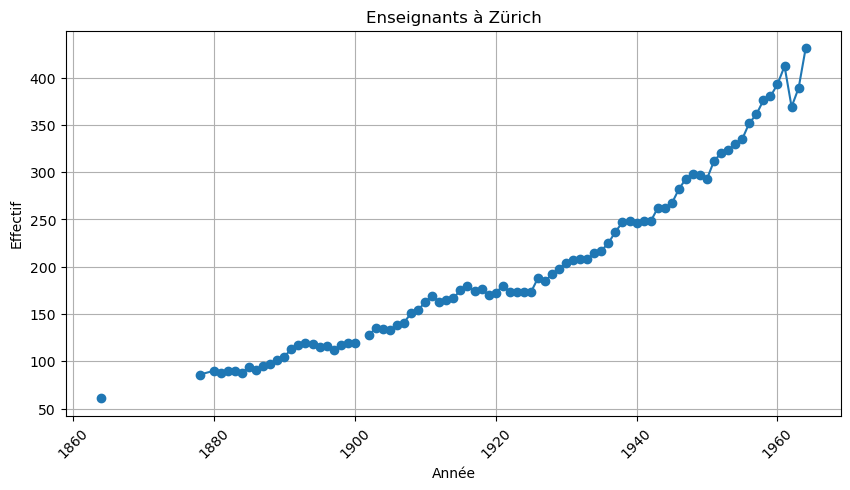

In [28]:
plt.figure(figsize=(10, 5))  # Définit la taille de la figure
plt.plot(df['AN'], df['Z_Total'], marker='o', linestyle='-')  # Trace la ligne avec des points à chaque donnée
# Il est important de marquer les données rééllement existantes par un signe (un point ici).
# Cela permet d'éviter une fausse impression de continuité de la série quand des données sont manquantes
plt.title ('Enseignants à Zürich')
# Ajoute un titre
plt.xlabel('Année')  # Nomme l'axe des x
plt.ylabel('Effectif')  # Nomme l'axe des y
plt.grid(True) 
# Ajoute une grille pour une meilleure lisibilité
plt.xticks(rotation=45) 
# Oriente les étiquettes des x pour mieux les lire

plt.show()  # Affiche le graphique



Le nombre d'enseignants intervenant à Zürich augmente considérablement au cours de la période. Cette augmentation n'est au début de la période pas linéaire mais se produit par paliers. Nous disponsons de séries pour trois universités, nous pouvons représenter plusiurs séries temporelles sur le même graphique, de manière à pouvoir comparer les évolutions. 


## Représentation simultanée de plusieurs séries temporelles

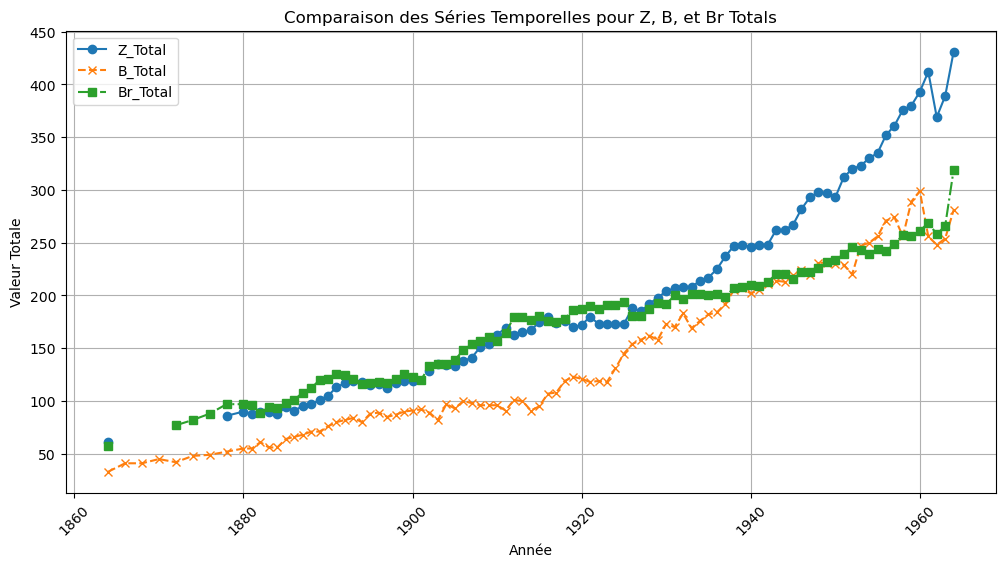

In [29]:


# Tracé des séries temporelles
plt.figure(figsize=(12, 6))
plt.plot(df['AN'], df['Z_Total'], marker='o', linestyle='-', label='Z_Total')
plt.plot(df['AN'], df['B_Total'], marker='x', linestyle='--', label='B_Total')
plt.plot(df['AN'], df['Br_Total'], marker='s', linestyle='-.', label='Br_Total')
plt.title('Comparaison des Séries Temporelles pour Z, B, et Br Totals')
plt.xlabel('Année')
plt.ylabel('Valeur Totale')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## Moyennes mobiles et lissage des séries